Figures that I want to incldue potentially:



Figures that I want to incldue potentially:



In [1]:
import torch
import torch.nn as nn
import numpy as np

# from utils.adv_trainer import *

import os
import sys
root = os.path.abspath('/home/mbeliaev/home/code/robust-l0/')
sys.path.append(root)

from utils.models import *
from utils.helpers import *
from utils.attack import *

from tqdm import trange
import pickle
import json

import torch

In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# colors used
ORANGE = '#FF9132'
RED   = '#B02105'
PINK = '#E600BF'
TEAL = '#0598B0'
GREEN = '#008F00'
PURPLE = '#8A2BE2'
GRAY = '#969696'
FIG_WIDTH = 3
FIG_HEIGHT = 3.5
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 8,
    "axes.titlesize": 10,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "lines.linewidth": 2
})

fig_path = os.path.join(root,'figures/')

In [3]:
result = pickle.load(open(os.path.join(root,'new_trained/final_long/MNIST/1/cnn_small/clean/k_0/adv_50/0/multi_rs_1.p'),'rb'))
k = np.arange(0,102,2)
print(k.shape)
print(np.array(result).shape)

(51,)
(51,)


In [4]:
data_keys = ['abs','f_0_0','f_0_12','f_0_50','f_12_12','f_50_50',]

data_labels = {
        'abs':'ABS',
        'f_0_0':'$f^{(0,0)}$',
        'f_0_12':'$f^{(0,12)}$',
        'f_0_50':'$f^{(0,50)}$',
        'f_12_12':'$f^{(12,12)}$',
        'f_50_50':'$f^{(50,50)}$',
}

data_colors = {
        'abs':GREEN,
        'f_0_0':GRAY,
        'f_0_12':ORANGE,
        'f_0_50':RED,
        'f_12_12':ORANGE,
        'f_50_50':RED,
}

data_zorder = {
        'abs':1,
        'f_0_0':0,
        'f_0_12':0,
        'f_0_50':0,
        'f_12_12':0,
        'f_50_50':0,
}

data_style = {
        'abs':'solid',
        'f_0_0':'solid',
        'f_0_12':'dashed',
        'f_0_50':'dashed',
        'f_12_12':'solid',
        'f_50_50':'solid',
}

data_path_b1_MNIST = {
        'abs':'new_trained/abs/result.p',
        'f_0_0':'new_trained/final_long/MNIST/1/cnn_small/clean/k_0/adv_50/0/multi_rs_1.p',
        'f_0_12':'new_trained/final_long/MNIST/1/cnn_small/og/k_0/adv_12/0/multi_rs_1.p',
        'f_0_50':'new_trained/final_long/MNIST/1/cnn_small/og/k_0/adv_50/0/multi_rs_1.p',
        'f_12_12':'new_trained/final_long/MNIST/1/cnn_small/simple/k_12/adv_12/0/multi_rs_1.p',
        'f_50_50':'new_trained/final_long/MNIST/1/cnn_small/simple/k_50/adv_50/0/multi_rs_1.p',
}

# abs does identical to clean network when we increase beta
data_path_b100_MNIST = {
        'abs':'new_trained/final_long/MNIST/1/cnn_small/clean/k_0/adv_50/0/multi_rs_100.p',
        'f_0_0':'new_trained/final_long/MNIST/1/cnn_small/clean/k_0/adv_50/0/multi_rs_100.p',
        'f_0_12':'new_trained/final_long/MNIST/1/cnn_small/og/k_0/adv_12/0/multi_rs_100.p',
        'f_0_50':'new_trained/final_long/MNIST/1/cnn_small/og/k_0/adv_50/0/multi_rs_100.p',
        'f_12_12':'new_trained/final_long/MNIST/1/cnn_small/simple/k_12/adv_12/0/multi_rs_100.p',
        'f_50_50':'new_trained/final_long/MNIST/1/cnn_small/simple/k_50/adv_50/0/multi_rs_100.p',
}

data_path_b1_CIFAR = {
        'f_0_0':'new_trained/final_long/CIFAR/1/VGG16/clean/k_0/adv_100/0/multi_rs_1.p',
        'f_0_12':'new_trained/final_long/CIFAR/1/VGG16/og/k_0/adv_12/0/multi_rs_1.p',
        'f_0_50':'new_trained/final_long/CIFAR/1/VGG16/og/k_0/adv_50/0/multi_rs_1.p',
        'f_12_12':'new_trained/final_long/CIFAR/1/VGG16/simple/k_12/adv_12/0/multi_rs_1.p',
        'f_50_50':'new_trained/final_long/CIFAR/1/VGG16/simple/k_50/adv_50/0/multi_rs_1.p',
}

# abs does identical to clean network when we increase beta
data_path_b100_CIFAR = {
        'f_0_0':'new_trained/final_long/CIFAR/1/VGG16/clean/k_0/adv_100/0/multi_rs_100.p',
        'f_0_12':'new_trained/final_long/CIFAR/1/VGG16/og/k_0/adv_12/0/multi_rs_100.p',
        'f_0_50':'new_trained/final_long/CIFAR/1/VGG16/og/k_0/adv_50/0/multi_rs_100.p',
        'f_12_12':'new_trained/final_long/CIFAR/1/VGG16/simple/k_12/adv_12/0/multi_rs_100.p',
        'f_50_50':'new_trained/final_long/CIFAR/1/VGG16/simple/k_50/adv_50/0/multi_rs_100.p',
}

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_pad = np.concatenate((np.ones((box_pts-1)//2)*y[0],y,np.ones((box_pts-1)//2)*y[-1]))
    y_smooth = np.convolve(y_pad, box, mode='valid')
    return y_smooth

    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


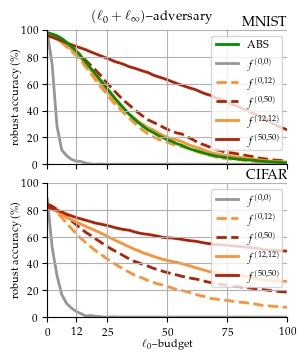

In [5]:
fig_name = 'beta_1'
data_keys = ['abs','f_0_0','f_0_12','f_0_50','f_12_12','f_50_50',]
k_values = np.arange(0,102,2)
box_pts = 7

fig = plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))
heights = [0.5,0.5]
# 3 SUBPLOTS
widths = [1]
spec = fig.add_gridspec(ncols=len(widths), 
                        nrows=len(heights), 
                        width_ratios=widths,
                        height_ratios=heights,
                        left=0.15,
                        right=0.95,
                        top=0.92,
                        bottom=0.1)

spec.update(wspace=0.15, hspace=0.14)


axs = [fig.add_subplot(spec[i,0]) for i in range(len(heights))]
# axs0 will deal with beta0

# hide other axes
# axs[1].set_yticklabels([])
# axs[0] is without retraining
axs[0].set_title('MNIST',pad=3,loc='right')
axs[1].set_title('CIFAR',pad=3,loc='right')

# plot with non robust accuracy shown
for key in data_keys:
    data_MNIST = pickle.load(open(os.path.join(root,data_path_b1_MNIST[key]),'rb'))
    if key not in ['f_0_0']:
        data_MNIST = smooth(data_MNIST,box_pts)
    axs[0].plot(k_values,
                data_MNIST,
                color=data_colors[key],
                label=data_labels[key],
                linestyle=data_style[key],
                zorder=data_zorder[key])

    if key not in ['abs']:
        data_CIFAR = pickle.load(open(os.path.join(root,data_path_b1_CIFAR[key]),'rb'))
        if key not in ['f_0_0']:
            data_CIFAR = smooth(data_CIFAR,box_pts)
        axs[1].plot(k_values,
                data_CIFAR,
                color=data_colors[key],
                label=data_labels[key],
                linestyle=data_style[key],
                zorder=data_zorder[key])
    # if key not in ['clean_k0']:
    #     data_beta_1 = smooth(data_beta_1,box_pts)
    # if key not in ['adv_k0' ,'clean_k0','abs']:
    #     data_beta_100 = smooth(data_beta_100,box_pts)
    # print(key)
    # print(data_beta_1[0])
    # print(data_beta_100[0])



axs[0].set_xlim(0,100)
axs[0].set_ylim(0,100)
axs[1].set_xlim(0,100)
axs[1].set_ylim(0,100)

axs[0].grid()
axs[1].grid()
# axs[0].set_xlabel('$\ell_0$--budget/truncation $(k=k_{adv})$\n(a)',labelpad=0)
# axs[1].set_xlabel('$\ell_0$--budget/truncation $(k=k_{adv})$\n(a)',labelpad=0)
axs[1].set_xlabel('$\ell_0$--budget',labelpad=0)
axs[0].set_ylabel('robust accuracy (\%)',labelpad=0)
axs[1].set_ylabel('robust accuracy (\%)',labelpad=0)
axs[0].set_xticks([0,12,25,50,75,100])
# axs[0].set_xticklabels([0,12,25,50,75,100])
axs[0].set_xticklabels([])
axs[1].set_xticks([0,12,25,50,75,100])
axs[1].set_xticklabels([0,12,25,50,75,100])
axs[1].legend(loc='upper right')
axs[0].legend(loc='upper right')

fig.suptitle('$(\\ell_0 + \\ell_\\infty)$--adversary')
# plt.show()
plt.savefig(fig_path+fig_name+'.eps')
plt.savefig(fig_path+fig_name+'.pdf')








The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


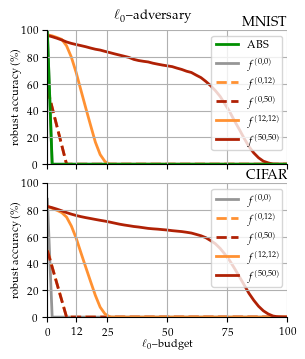

In [6]:
fig_name = 'beta_100'
data_keys = ['abs','f_0_0','f_0_12','f_0_50','f_12_12','f_50_50',]
k_values = np.arange(0,102,2)

fig = plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))
heights = [0.5,0.5]
# 3 SUBPLOTS
widths = [1]
spec = fig.add_gridspec(ncols=len(widths), 
                        nrows=len(heights), 
                        width_ratios=widths,
                        height_ratios=heights,
                        left=0.15,
                        right=0.95,
                        top=0.92,
                        bottom=0.1)

spec.update(wspace=0.15, hspace=0.14)



axs = [fig.add_subplot(spec[i,0]) for i in range(len(heights))]
# axs0 will deal with beta0

# hide other axes
# axs[1].set_yticklabels([])
# axs[0] is without retraining
axs[0].set_title('MNIST',pad=3,loc='right')
axs[1].set_title('CIFAR',pad=3,loc='right')

# plot with non robust accuracy shown
for key in data_keys:
    data_MNIST = pickle.load(open(os.path.join(root,data_path_b100_MNIST[key]),'rb'))
    if key not in ['f_0_0','abs']:
        data_MNIST = smooth(data_MNIST,box_pts)
    else:
        data_MNIST_new = np.zeros_like(data_MNIST)
        data_MNIST_new[0:10] = data_MNIST[0:10]
        data_MNIST = data_MNIST_new
    axs[0].plot(k_values,
                data_MNIST,
                color=data_colors[key],
                label=data_labels[key],
                linestyle=data_style[key],
                zorder=data_zorder[key])
                
    # if key not in ['f_0_0']:
    #     data_MNIST = smooth(data_MNIST,box_pts)

    if key not in ['abs']:
        data_CIFAR = pickle.load(open(os.path.join(root,data_path_b100_CIFAR[key]),'rb'))
        if key not in ['f_0_0',]:
            data_CIFAR = smooth(data_CIFAR,box_pts)
        axs[1].plot(k_values,
                data_CIFAR,
                color=data_colors[key],
                label=data_labels[key],
                linestyle=data_style[key],
                zorder=data_zorder[key])


axs[0].set_xlim(0,100)
axs[0].set_ylim(0,100)
axs[1].set_xlim(0,100)
axs[1].set_ylim(0,100)
axs[0].grid()
axs[1].grid()
# axs[0].set_xlabel('$\ell_0$--budget/truncation $(k=k_{adv})$\n(a)',labelpad=0)
# axs[1].set_xlabel('$\ell_0$--budget/truncation $(k=k_{adv})$\n(a)',labelpad=0)
axs[1].set_xlabel('$\ell_0$--budget',labelpad=0)
axs[0].set_ylabel('robust accuracy (\%)',labelpad=0)
axs[1].set_ylabel('robust accuracy (\%)',labelpad=0)
axs[0].set_xticks([0,12,25,50,75,100])
# axs[0].set_xticklabels([0,12,25,50,75,100])
axs[0].set_xticklabels([])
axs[1].set_xticks([0,12,25,50,75,100])
axs[1].set_xticklabels([0,12,25,50,75,100])
axs[1].legend(loc='upper right')
axs[0].legend(loc='upper right')

fig.suptitle('$\\ell_0$--adversary')
# plt.show()
plt.savefig(fig_path+fig_name+'.eps')
plt.savefig(fig_path+fig_name+'.pdf')

